# 2値化シミュレーション

## parameters

In [1]:
# 2値化パラメータ(初期値)
red_low_h = 0
red_low_s = 127
red_low_v = 0
red_high_h = 15
red_high_s = 255
red_high_v = 255

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
#from matplotlib.widgets import Slider
from ipywidgets import IntSlider, interact, fixed
import tkinter
import tkinter.filedialog
import tkinter.messagebox
%matplotlib inline

## 画像入力

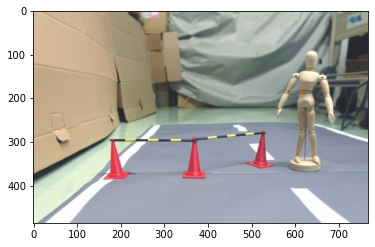

interactive(children=(IntSlider(value=0, description='low_h', max=360), IntSlider(value=127, description='low_…

<function __main__.f(img, low_h, low_s, low_v, high_h, high_s, high_v)>

In [3]:
#------------------------------
# [画像読み込み]
#------------------------------
# GUIによる画像選択
root=tkinter.Tk()
root.withdraw()
fTyp = [('画像ファイル','*.jpg;*.png'), ('すべて', '*.*')]
img_path = tkinter.filedialog.askopenfilename(filetypes=fTyp)
# 画像pathの手入力
#img_path = "./images/barricade_fpt_web_page.jpg"
# 画像読み込み(BGR)
img = cv2.imread(img_path)
# webカメラ画像読み込み(カメラチャンネル0の場合)
#camera = cv2.VideoCapture(0)
#ret, img = camera.read()
#------------------------------
# [元画像の表示]
#------------------------------
# 画像の表示
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()
#------------------------------
# [画像の2値化]
#------------------------------
# HSV変換
img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
# jupyterでない場合は使用(未完成)
#low_h = Slider(ax2, label="low_h", valmin=0, valmax=360, valinit=red_low_h, valstep=1, valfmt="%d")
#low_s = Slider(ax3, label="low_s", valmin=0, valmax=255, valinit=red_low_s, valstep=1, valfmt="%d")
#low_v = Slider(ax4, label="low_v", valmin=0, valmax=255, valinit=red_low_v, valstep=1, valfmt="%d")
#high_h = Slider(ax5, label="high_h", valmin=0, valmax=360, valinit=red_high_h, valstep=1, valfmt="%d")
#high_s = Slider(ax6, label="high_s", valmin=0, valmax=255, valinit=red_high_s, valstep=1, valfmt="%d")
#high_v = Slider(ax7, label="high_v", valmin=0, valmax=255, valinit=red_high_v, valstep=1, valfmt="%d")
#plt.show()
# jupyter実行時用スライダー
low_h = IntSlider(value=red_low_h, min=0, max=360, step=1, description="low_h")
low_s = IntSlider(value=red_low_s, min=0, max=255, step=1, description="low_s")
low_v = IntSlider(value=red_low_v, min=0, max=255, step=1, description="low_v")
high_h = IntSlider(value=red_high_h, min=0, max=360, step=1, description="high_h")
high_s = IntSlider(value=red_high_s, min=0, max=255, step=1, description="high_s")
high_v = IntSlider(value=red_high_v, min=0, max=255, step=1, description="high_v")
# スライダーの値が変化するたびに呼び出す関数
def f(img, low_h, low_s, low_v, high_h, high_s, high_v):
    # 2値化(マスク画像作成)
    lower = (low_h, low_s, low_v)
    upper = (high_h, high_s, high_v)
    img_binary = cv2.inRange(img, lower, upper)
    # BGR変換
    img = cv2.cvtColor(img, cv2.COLOR_HSV2BGR)
    # デバッグ画像作成(0に変換される部分を青塗り)
    img[img_binary==0] = (255, 0, 0)
    # 画像の表示
    fig = plt.figure()
    ax1 = fig.add_subplot(1,1,1)
    ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    return cv2.countNonZero(img_binary)

interact(f, img=fixed(img), low_h=low_h, low_s=low_s, low_v=low_v, high_h=high_h, high_s=high_s, high_v=high_v)